In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import export_graphviz
import graphviz

## Navigate to machine learning processes

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Old files 2023\BEEE Notes\Flipkart_smartphonesshuffled.csv')
df.head()

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity,battery_type,Label
0,VIVO,VIVO T1 44W,Starry Sky,19990,14499,4.5,87331,6044,4.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium,1
1,APPLE,APPLE IPHONE 11,White,48900,47199,4.6,184191,10818,NaN,128.0,A Bionic Chip,12MP + 12MP,12MP,15.49,NaN,NaN,1
2,VIVO,VIVO T1 44W,Midnight Galaxy,20990,15999,4.4,51365,3750,6.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium,1
3,XIAOMI,POCO M4 5G,Power Black,15999,11999,4.2,53448,4185,4.0,64.0,Mediatek Dimensity 700,50MP + 2MP,8MP,16.71,5000.0,Lithium Polymer,1
4,XIAOMI,REDMI 10,Caribbean Green,14999,9299,4.3,187787,12084,4.0,64.0,Qualcomm Snapdragon 680,50MP + 2MP,5MP,17.02,6000.0,Lithium Polymer,1


In [3]:
df.shape

(1672, 17)

In [4]:
df.describe()

,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,display_size,battery_capacity,Label
count,1672.000000,1672.000000,1672.000000,1.672000e+03,1672.000000,1514.000000,1640.000000,1672.000000,1556.000000,1672.00000
mean,26112.848086,21532.468900,4.272488,4.169612e+04,3144.740431,5.225892,108.458537,16.525179,4950.931877,0.50000
std,23774.000580,21356.879795,0.283998,9.081457e+04,7522.366113,2.006721,69.153300,0.681985,501.897428,0.50015
min,4899.000000,3599.000000,0.000000,0.000000e+00,0.000000,1.000000,8.000000,10.160000,1600.000000,0.00000
25%,13999.000000,9999.000000,4.200000,9.227500e+02,78.000000,4.000000,64.000000,16.510000,5000.000000,0.00000
50%,17999.000000,14999.000000,4.300000,5.917500e+03,514.000000,6.000000,128.000000,16.660000,5000.000000,0.50000
75%,25999.000000,22992.250000,4.400000,3.995500e+04,3314.000000,6.000000,128.000000,16.760000,5000.000000,1.00000
max,159900.000000,152999.000000,4.700000,1.171704e+06,122453.000000,8.000000,512.000000,17.780000,7000.000000,1.00000


In [5]:
df['memory'].fillna(int(df['memory'].mean()), inplace = True)

In [6]:
df['storage'].fillna(int(df['storage'].mean()), inplace = True)

In [7]:
df['battery_capacity'].fillna(int(df['battery_capacity'].mean()), inplace = True)

In [8]:
df['processor'].fillna('A Bionic Chip', inplace = True)

In [9]:
df['colour'].fillna('Red Gold', inplace = True)

In [10]:
df['front_camera'].fillna('20MP + 4.8MP Dual', inplace = True)

In [11]:
df['battery_type'].fillna('Lithium', inplace = True)

In [12]:
df.isnull().sum()

brand               0
model               0
colour              0
original_price      0
discounted_price    0
ratings             0
rating_count        0
reviews             0
memory              0
storage             0
processor           0
rear_camera         0
front_camera        0
display_size        0
battery_capacity    0
battery_type        0
Label               0
dtype: int64

In [13]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['brand', 'model', 'colour', 'processor', 'rear_camera', 'front_camera', 'battery_type']


In [14]:
df['front_camera'].value_counts()

 16MP              227
17MP               186
 8MP               162
 5MP               138
9MP                138
                  ... 
9MP + 9MP Dual       1
61MP                 1
14MP + 5MP Dual      1
32MP                 1
27MP + 9MP Dual      1
Name: front_camera, Length: 102, dtype: int64

In [15]:
X = df.drop(['Label'], axis=1)

y = df['Label']

In [16]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
encoder = ce.OneHotEncoder(cols= ['brand', 'model', 'colour', 'processor', 'rear_camera', 'front_camera','battery_type'])

x_train = encoder.fit_transform(X_train)

x_test = encoder.transform(X_test)

In [18]:
classifier = RandomForestClassifier(random_state=100,max_depth = 2,n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=100)

In [19]:
y_pred= classifier.predict(x_test) 
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,

In [20]:
y_pred= classifier.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9945652173913043


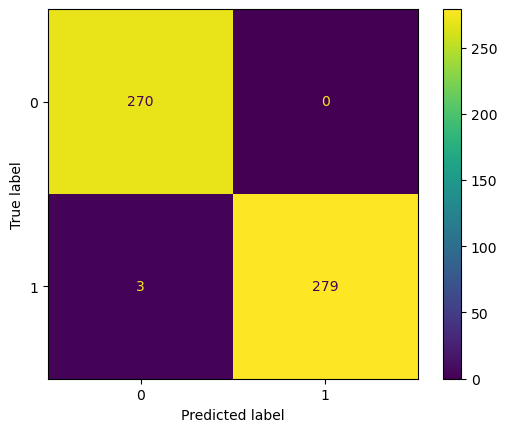

In [21]:
y_pred = classifier.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

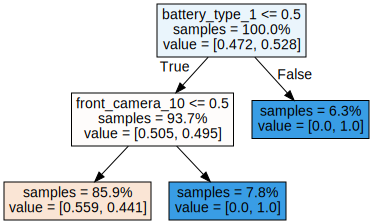

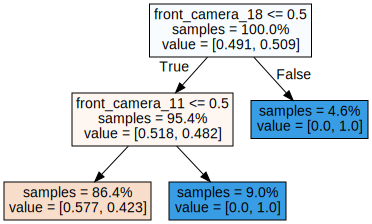

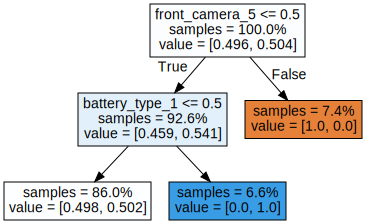

In [22]:
for i in range(3):
    tree = classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [23]:

clf = classifier
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=100)

In [24]:
import pickle
s = pickle.dumps(clf)
clf = pickle.loads(s)
clf.predict(x_train[0:1])

array([1], dtype=int64)

In [25]:
y_train

672     1
299     0
188     0
1331    0
1013    0
       ..
1162    0
193     1
211     0
1056    0
709     1
Name: Label, Length: 1120, dtype: int64

In [26]:
from joblib import dump, load
dump(clf, 'filename.joblib') 

['filename.joblib']

In [27]:
clf = load('filename.joblib')